In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as pl

# Week 15 Clustering

**Expected time = 2 hours**

## Assignment overview


This week you are learning about clustering. 
Clustering can be defined as 'the process of organising objects into groups whose members are similar in some way'.
Clustering is crucial because it determines the intrinsic grouping within unlabelled data. Clustering algorithms make some assumptions about data points to constitute their similarity. Thus, each hypothesis will construct different but equally valid clusters.

For example, if you built a fruit classifier, it would say 'this is an orange, this is an apple', based on you showing it examples of apples and oranges.
Clustering is the result of unsupervised learning, which means that you’ve seen lots of examples but don’t have labels. In this case, the clustering might return with 'fruits with soft skin and lots of dimples', 'fruits with shiny hard skin'  based merely on showing lots of fruit to the system, but not identifying the names of the different types of fruit. 


This assignment is designed to help you apply the machine learning algorithms you have learnt using packages in Python. Python concepts, instructions and a starter code are embedded within this Jupyter Notebook to guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.


### Learning objectives


- Define the concept of proximity for clustering methods
- Outline the steps involved in hierarchical clustering
- Understand why hierarchical clustering is myopic
- Outline the steps involved in K-means clustering



## Index:

#### Week 10:   Clustering


- [Part 1](#part1)- Hierarchical clustering
- [Part 2](#part2)- A simple example of hierarchical clustering  
- [Part 3](#part3) - Clustering
- [Part 4](#part4) - Importing the data set and exploratory data analysis (EDA)
- [Part 5](#part5) - Data preprocessing
- [Part 6](#part6)- Identify the areas in the city that experience more criminal activity
- [Part 7](#part7)- Clustering without normalisation
- [Part 8](#part8)- Clustering with normalisation
- [Part 9](#part9)- Using elbow curves





[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - Hierarchical clustering
    

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other, and the objects within each cluster are broadly similar to each other.

#### How hierarchical clustering works
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. 


The main output of hierarchical clustering is a **dendrogram**, which shows the hierarchical relationship between the clusters.


#### Measures of distance (similarity)

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city (like in the worked example above), the city block distance may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.


#### Linkage criteria
After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the two most similar parts of a cluster (single-linkage), the two least similar bits of a cluster (complete-linkage), the centre of the clusters (mean or average-linkage), or some other criterion. Many linkage criteria have been developed.

As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application. A key theoretical issue is what causes variation. For example, in archaeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.


### Steps to perform hierarchical clustering

- Step 1: First, we assign all the points to an individual cluster.
- Step 2: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance.
- Step 3: We will repeat Step 2 until only a single cluster is left.
- Step 4: How should we choose the number of clusters in hierarchical clustering?

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a dendrogram.
Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Therefore, the longer the distance of the vertical lines in the dendrogram, the longer the distance between those clusters.

Finally, we can set a threshold distance and draw a horizontal line across the dendrogram. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.


[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - A simple example of hierarchical clustering

After seeing what the basic steps of hierarchical clustering are, it's now time to walk through a simple example to test our understanding.

We will be working on a wholesale customer segmentation problem. You can download the data set using [this](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv) link. The data is hosted on the UCI Machine Learning repository. 

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories such as milk, grocery, region, etc.

As usual, we begin by importing the data set, Complete the code cell below by adding the name of the data set, "Wholesale customers data.csv" a `str` to `.read_csv()`. Assign the dataframe to the variable `data`.

In [3]:
data = pd.read_csv('data/Wholesale customers data.csv')


Run the code cell below to visualise the first 5 rows of our dataframe.

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. 

Our aim is to make clusters from this data that can segment similar clients together. Of course, hierarchical clustering seems to be the right strategy to solve this problem.


Run the code cell below to import the function `normalize()` from `scikit-learn` that we will use to normalise the data

In [5]:
from sklearn.preprocessing import normalize

Complete the code cell below by normalising the dataframe `data`. Assign the new data to the object `data_scaled`.

Next, use the `pandas` function `DataFrame()` to convert `data_scaled` to a dataframe `data_scaled`.
For convenience, set the parameter `columns = data.columns` to keep the original column names.

In [6]:
# Normalize the data
data_scaled = normalize(data)

# Convert the normalized data back to a dataframe
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

Run the code cell below to visualise the normalised dataframe.

1.	Why do you think it is important to normalise the data so that the scale of each variable is the same?
**Answer: Algorithms that rely on distance calculations, like k-means clustering, will be affected by the scale of the data. If one feature has a broad range of values, the distance will be dominated by this particular feature, and other features will have almost no influence on the distance calculation. **


In [7]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Next,  let’s first draw the dendrogram to help us decide the number of clusters for this particular problem.

Run the code cell below to create the dendrogram.

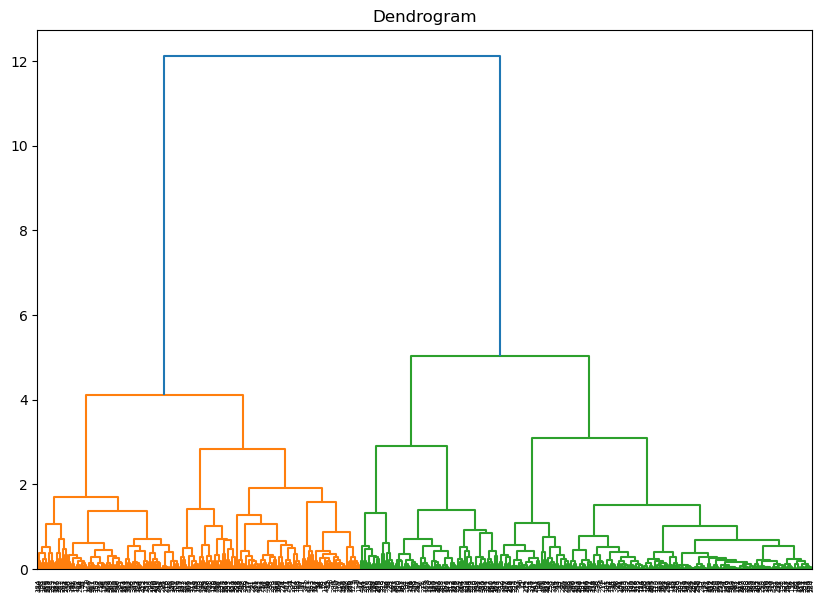

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence, we can decide on a threshold of 6 and cut the dendrogram.

Run the code cell below to visualise the dendrogram with the threshold line.

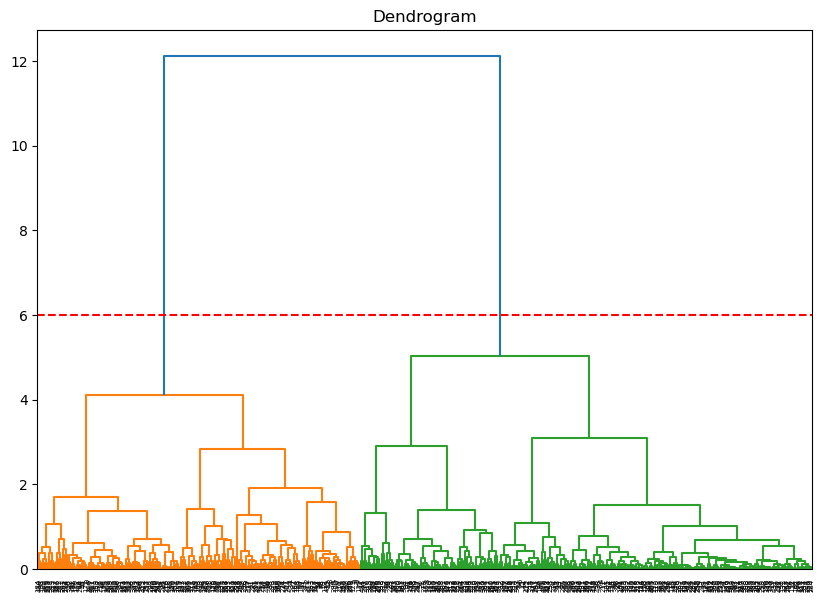

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

How many clusters do we have at this point?

**Answer: 2 **

We can now use the `AgglomerativeClustering()` from `scikit-learn` to apply hierarchical clustering for two clusters. The documentation about this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

In [10]:
from sklearn.cluster import AgglomerativeClustering

Complete the code cell below by setting the following parameters for `AgglomerativeClustering`
    
- `n_clusters = 2`
- `affinity='euclidean`
- `linkage='ward`

Finally, use the `fit_predict()` of the scaled dataframe to apply the clustering to our data.

In [11]:
# Set the parameters as specified
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Apply the clustering to the data using fit_predict
cluster_labels = cluster.fit_predict(data_scaled)

C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Why can we only see the values of 0s and 1s in the output?
**Answer: We have instructed the algorithm to find two clusters of the data ( i.e., n_clusters=2 in the KMeans instantiation). When KMeans is run with n_clusters=2, it assigns each data point to one of two clusters, labeled 0 or 1. The output you're seeing is the cluster assignment for each data point:
•	A 0 indicates that the corresponding data point is assigned to the first cluster.
•	A 1 indicates that the corresponding data point is assigned to the second cluster.
   **


Let’s now visualise the two clusters:

Text(0, 0.5, 'Grocery')

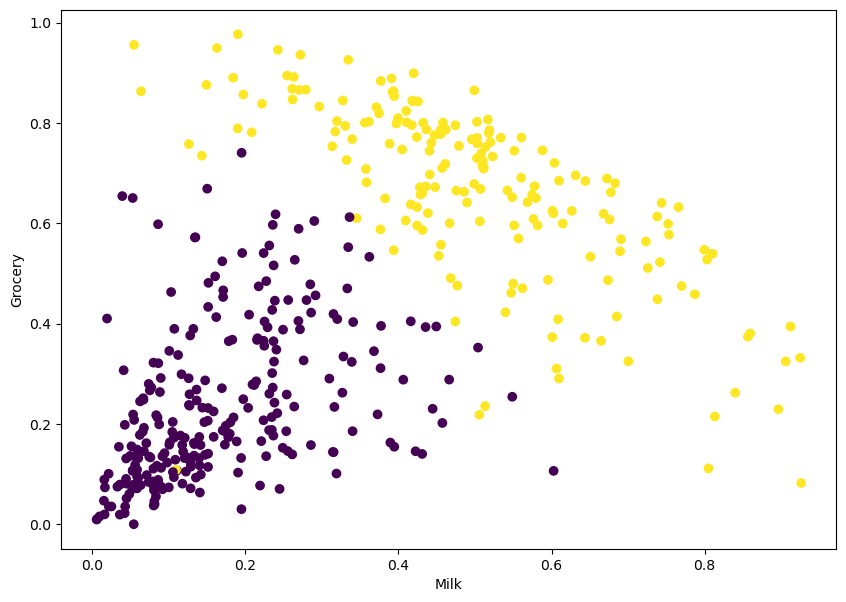

In [12]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 
plt.xlabel('Milk')
plt.ylabel('Grocery')

Awesome! As expected, we can clearly visualise the two clusters.

[Back to top](#Index:) 

<a id='part3'></a>

### Part 3 -  Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabelled data (i.e. data without defined categories or groups). The goal of this algorithm is to find groups in the data with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided. Data points are clustered based on the similarity in features. The results of the K-means clustering algorithm are as follows:

- The centroids of the K clusters, which can be used to label new data

- Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret the kind of group each cluster represents.

### Visualising crimes in Chicago using clustering


In this notebook, we will try and exploit information  regarding crimes in Chicago. We will perform the following steps:


- 1. Read the `Crimes_2001_to_present_sample.csv` file in Python
- 2. Drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Next, convert the column `Date` to datetime format and define two new columns, `date` and `time`.
- 3. Define a dataframe, `sub_df` with the columns `Ward`, `IUCR` and  `District`. Impute all the missing values with the most frequent value in each column. Drop any non-numerical value in the column `IUCR`.
- 4. Perform clustering without normalisation on the new dataframe. Compute the K-means for N=1,2,..,20 and their score to produce an elbow chart to predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the K-mean.
- 5. Perform clustering with normalisation on the new dataframe. Compute the K-means for N=1,2,..,20 and their score to produce an elbow chart to  predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the K-mean.




[Back to top](#Index:) 

<a id='part4'></a>

### Part 4 -  Importing the data set and exploratory data analysis (EDA)

The data set contains records from 2001 to present day, but with only 65k-66k records compared to the original dataset, which has around 6.6m records. If anyone is interested in analysing the original data set, it can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

Nonetheless, 65k instances should be enough information to give us some good insights into the crime scene in Chicago. Let's get started by importing the necessary libraries.

 We will then use `pandas` to import the data set. Complete the code cell below by adding the name of the data set as a `str` to `.read_csv()`. Assign the dataframe to the variable `df`.

In [3]:
df=pd.read_csv('data/Crimes_2001_to_present_sample.csv')



Before building any machine learning algorithms, we should explore the data.

We begin by visualising the first ten rows of the dataframe `df` using the function `.head()`. By default, `.head()` displays the first five rows of a dataframe.

Complete the code cell below by passing the desired number of rows as an `int` to the function `.head()`.

In [4]:
df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,4.0,39.0,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,29.0,25.0,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,39.0,13.0,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,27.0,23.0,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)"
5,6162396,2182182,HH429064,06/09/2002 05:00:23 AM,045XX N ASHLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,47.0,3.0,18,1164839.0,1930205.0,2002,04/15/2016 08:55:02 AM,41.964093,-87.669321,"(41.964093, -87.669321)"
6,720409,2839797,HJ500224,07/16/2003 05:45:00 PM,016XX N MAPLEWOOD AVE,0620,BURGLARY,UNLAWFUL ENTRY,PARK PROPERTY,False,...,1.0,24.0,05,1159114.0,1910852.0,2003,04/15/2016 08:55:02 AM,41.911107,-87.690903,"(41.911107, -87.690903)"
7,2251410,7313423,HS117845,01/12/2010 10:30:00 PM,015XX S SANGAMON ST,0810,THEFT,OVER $500,STREET,False,...,25.0,28.0,06,1170443.0,1892718.0,2010,02/04/2016 06:33:39 AM,41.861105,-87.649815,"(41.861105, -87.649815)"
8,557591,10374717,HZ110903,12/27/2015 02:13:00 AM,050XX S WASHINGTON PARK CT,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,...,3.0,38.0,26,NaN,NaN,2015,01/15/2016 12:18:25 PM,NaN,NaN,NaN
9,4676604,3339646,HK381485,05/22/2004 07:07:14 PM,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,...,42.0,32.0,06,1176352.0,1900927.0,2004,04/15/2016 08:55:02 AM,41.883500,-87.627877,"(41.8835, -87.627877)"


[Back to top](#Index:) 

<a id='part5'></a>

### Part 5 - Data preprocessing

When building any machine learning algorithm, it is always useful, after analysing your data, to eliminate features that are redundant or that won't be useful in our analysis.

Complete the code cell below to drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Remember to include the names of the columns in square brackets and that the axis parameter in `.drop()` controls whether the function acts on rows or columns.

In [5]:
# List of columns to drop
columns_to_drop = ['X Coordinate', 'Y Coordinate', 'Updated On', 'Location', 'Beat']

# Drop the columns from the dataframe
df.drop(columns=columns_to_drop, axis=1, inplace=True)


It may be useful for our analysis to know the date and the time when a certain crime happened. All this information is enclosed in the column `Date`. However, if you run the cell below, you may observe that the entries in `Date` are of type "object" instead of a date-specific object like `Timestamp`.

In [6]:
print(df.Date.dtype)

object


Luckily,  `pandas` comes with a very powerful function, `datetime()`, that can convert date strings to the datetime format. Documentation about this function can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

Complete the code cell below by applying the function `datetime` on the column `Date`.

In [7]:
df['Date'] = pd.to_datetime(df['Date']) 


The function `datetime` is so powerful that it allows us to separate the date from the time.

Run the code cell below to see how we create a new column `date` containing just the date of the crime. This cell uses list comprehension to convert each date and time in `Date` to a date. The resulting list is reassigned to the column `date`.

In [8]:
df['date'] = [d.date() for d in df['Date']]

Following the syntax used in the code cell above, complete the cell below to create a columns `time` containing the time at which each crime happened.

In [9]:
df['time'] = [d.time() for d in df['Date']]


Let's visualise the new dataframe. Notice the two new columns we have just created.

In [10]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,date,time
0,4506608,9878952,HX529642,2014-12-04 09:30:00,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,True,2.0,4.0,39.0,04B,2014,41.809597,-87.601016,2014-12-04,09:30:00
1,561379,2514319,HH857213,2002-12-24 09:00:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,True,15.0,29.0,25.0,14,2002,41.873845,-87.763183,2002-12-24,09:00:00
2,5058884,3891396,HL266026,2005-03-31 11:46:00,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,False,17.0,39.0,13.0,15,2005,41.973168,-87.713495,2005-03-31,11:46:00
3,3619502,4983700,HM446634,2006-06-30 16:44:00,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,11.0,27.0,23.0,26,2006,41.895505,-87.711742,2006-06-30,16:44:00
4,5533749,5284225,HM654977,2006-10-11 23:05:00,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,11.0,24.0,25.0,16,2006,41.871248,-87.744926,2006-10-11,23:05:00


[Back to top](#Index:) 

<a id='part6'></a>

### Part 6 -  Identify the areas in the city that experience more criminal activity

To identify which portions of the city experience criminal attacks of which type, it may be useful to  cluster the data according to the `District`, `Ward` and `Primary Type`(as per IUCR [Illinois Uniform Crime Reporting] code). IUCR codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports, you can find more information [here](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data)).

Because we are only interested in the features `District`, `Ward` and `Primary Type`, it may be convenient to select only those features from the original dataframe.

Complete the cell below by extracting  `District`, `Ward` and `Primary Type` from `df` and assign the new dataframe to `sub_df`.

In [11]:
sub_df = df[['District', 'Ward', 'Primary Type','IUCR']]

Let's visualise our new dataframe.

In [12]:
sub_df.head(10)

,District,Ward,Primary Type,IUCR
0,2.0,4.0,BATTERY,0497
1,15.0,29.0,CRIMINAL DAMAGE,1320
2,17.0,39.0,WEAPONS VIOLATION,141C
3,11.0,27.0,NARCOTICS,2092
4,11.0,24.0,PROSTITUTION,1506
5,19.0,47.0,NARCOTICS,1811
6,14.0,1.0,BURGLARY,0620
7,12.0,25.0,THEFT,0810
8,2.0,3.0,OTHER OFFENSE,2820
9,1.0,42.0,THEFT,0860


We can see that we have some missing values (NaNs). The general technique to fill missing values in a dataframe is call **imputation**.

A very popular way to impute values is by filling missing values with the most frequent value from one column. This can be done by using the function `.apply()` on our dataframe together with the appropriate lambda function.

Complete the lambda function that needs to be passed to `.apply()` in the code cell below.

**HINT:** Use a combination of the functions `fillna()`, `value_counts()` and `index()`.

In [13]:
sub_df = sub_df.apply(lambda x: x.fillna(x.value_counts().index[0]) )


Finally, before moving on to clustering we will extract the numeric values in the columns `IUCR` and visualize our new dataframe.

Run the code cell below.

In [14]:
sub_df['IUCR'] = sub_df.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_df.head(10)

,District,Ward,Primary Type,IUCR
0,2.0,4.0,BATTERY,497
1,15.0,29.0,CRIMINAL DAMAGE,1320
2,17.0,39.0,WEAPONS VIOLATION,141
3,11.0,27.0,NARCOTICS,2092
4,11.0,24.0,PROSTITUTION,1506
5,19.0,47.0,NARCOTICS,1811
6,14.0,1.0,BURGLARY,620
7,12.0,25.0,THEFT,810
8,2.0,3.0,OTHER OFFENSE,2820
9,1.0,42.0,THEFT,860


[Back to top](#Index:) 

<a id='part7'></a>

### Part 7 - K-means Clustering without normalisation

First of all we will fit a K-means cluster with k=10. We won't normalize the data at first to see what happens. 

Complete the code cell below by importing `Kmeans` from `sklearn.cluster`.

In [15]:
from sklearn.cluster import KMeans


Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [16]:
sub_df_encoded = pd.get_dummies(sub_df, columns=['Primary Type'])


In [17]:
# Assuming 'n_clusters' is set to the optimal number of clusters you've determined
n_clusters = 10 # Your optimal number of clusters

# Initialize KMeans with the optimal number of clusters
km = KMeans(n_clusters=n_clusters)

# Compute K-means clustering
km.fit(sub_df_encoded)

# Predict the closest cluster each sample in sub_df belongs to
predictions = km.predict(sub_df_encoded)

C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
sub_df_encoded.head()

,District,Ward,IUCR,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,...,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION
0,2.0,4.0,497,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,29.0,1320,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,17.0,39.0,141,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11.0,27.0,2092,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11.0,24.0,1506,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Run the code cell below to visualise the clusters obtained without normalisation.

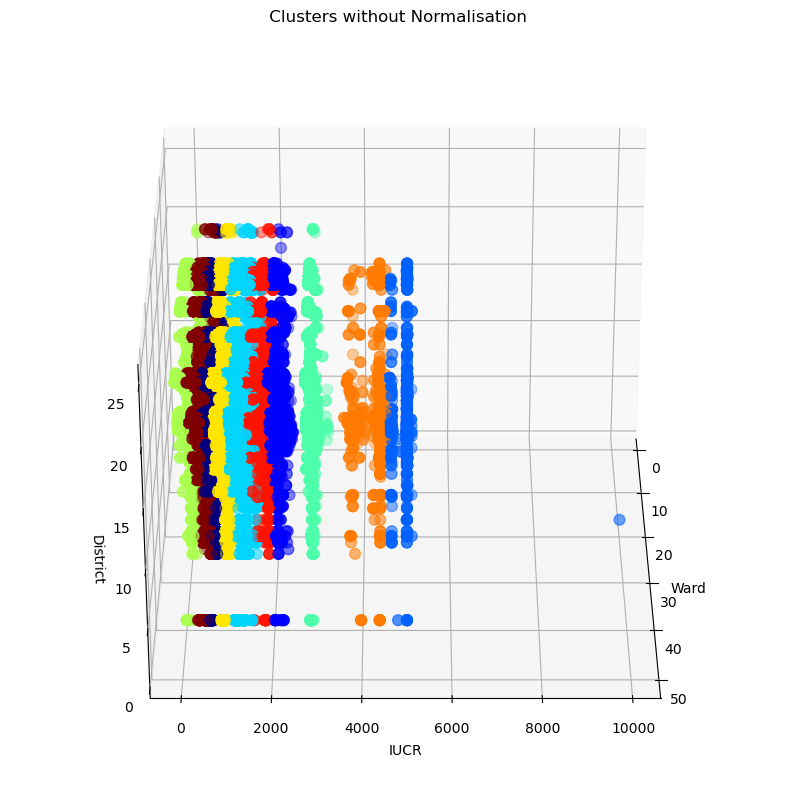

In [19]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df_encoded['Ward'])
y = np.array(sub_df_encoded['IUCR'])
z = np.array(sub_df_encoded['District'])

pl.title(' Clusters without Normalisation')
ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = predictions, s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

What do you notice about the clusters?
**Answer  
The distribution of clusters seems uneven, with some clusters having more points while others have fewer. This could be due to the varying scales of the features, which affect the clustering process.
'IUCR' axis is dominating the distance calculation in the K-means algorithm. This means that 'IUCR' values will have a greater impact on the clustering result than 'District' or 'Ward'. The clusters are elongated along the axis of IUCR, rather than being more spherical and equidistant like K-mean clusters. 
**

[Back to top](#Index:) 

<a id='part8'></a>

### Part 8 - K-means Clustering with normalisation

As expected, K-means without normalisation doesn't work very well. We can fix this by normalising the data.
    


We start by normalizing the data.

In the code cell below, we have normalised the column `IUCR` using the formula:

$$y_\text{norm} = \frac{y - \min(y)}{\max(y) - \min(y)}$$

In [20]:
sub_df['IUCR'] = (sub_df['IUCR'] - sub_df['IUCR'].min())/(sub_df['IUCR'].max()-sub_df['IUCR'].min())

Complete the code cell below to normalise the columns `Ward` and `District` following the example given above.

In [21]:
sub_df['Ward'] = (sub_df['Ward'] - sub_df['Ward'].min())/(sub_df['Ward'].max()-sub_df['Ward'].min())
sub_df['District'] = (sub_df['District'] - sub_df['District'].min())/(sub_df['District'].max()-sub_df['District'].min())

In [22]:
sub_df.head(10)

,District,Ward,Primary Type,IUCR
0,0.041667,0.061224,BATTERY,0.047214
1,0.583333,0.571429,CRIMINAL DAMAGE,0.130598
2,0.666667,0.775510,WEAPONS VIOLATION,0.011145
3,0.416667,0.530612,NARCOTICS,0.208815
4,0.416667,0.469388,PROSTITUTION,0.149443
5,0.750000,0.938776,NARCOTICS,0.180344
6,0.541667,0.000000,BURGLARY,0.059676
7,0.458333,0.489796,THEFT,0.078926
8,0.041667,0.040816,OTHER OFFENSE,0.282573
9,0.000000,0.836735,THEFT,0.083992


Without normalising the data, the best number of clusters is around 4, so let's try that out!

Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [23]:
sub_df_encoded = pd.get_dummies(sub_df, columns=['Primary Type'])

In [24]:
# Assuming 'n_clusters' is set to the optimal number of clusters you've determined
n_clusters = 4 # Your optimal number of clusters

# Initialize KMeans with the optimal number of clusters
km = KMeans(n_clusters=n_clusters)

# Compute K-means clustering
km.fit(sub_df_encoded)

# Predict the closest cluster each sample in sub_df belongs to
predictions = km.predict(sub_df_encoded)


C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Run the code cell below to visualise the clusters obtained without normalisation. you can change the value in `ax.view_init(azim=90)` to rotate the plot.

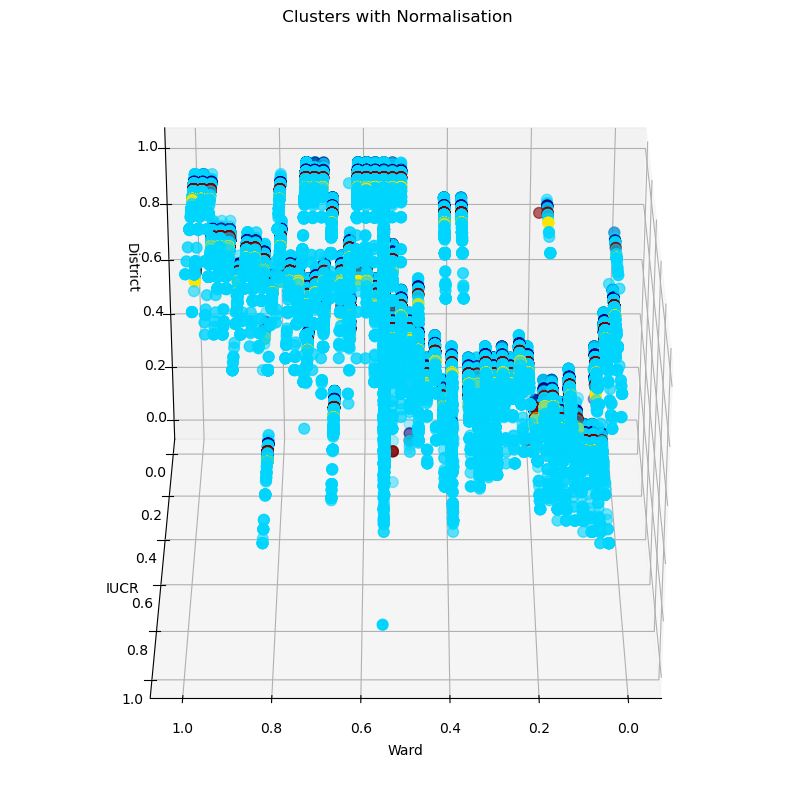

In [25]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df_encoded['Ward'])
y = np.array(sub_df_encoded['IUCR'])
z = np.array(sub_df_encoded['District'])

pl.title(' Clusters with Normalisation')
ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = predictions, s=60, cmap="jet")
ax.view_init(azim=90)
#print(ax.azim)
plt.show()

How did the clusters change from the unnormalized version? 
**Answer
After the data is normalised, the data points are distributed more evenly across the axes, and the clusters seem more cohesive and well-defined compared to the unnormalised version.  Each feature has an equal chance of influencing the cluster assignments since they are on the same scale. The clusters appear more dense and compact because normalisation reduces the impact of outlier values that might otherwise stretch the clusters across a wide range of values on a particular axis.**

[Back to top](#Index:) 

<a id='part9'></a>

### Part 9 - Using the Elbow Rule

To find the **optimal number of clusters**, we will go with the elbow rule, which states that on the curve of score vs the number of clusters, the optimal point is where the first bend (or *elbow*) occurs, because after that the the score eventually decreases to zero and each point starts behaving as its own cluster. 

Next, to reproduce the "elbow chart", we need to compute the score for each number of clusters.

First, we need a list of models defined for a varying number of clusters. Then, we can fit each model on the data to get a score for the model and determine the model with the best number of clusters.

Complete the for loop in the code cell below to compute the K-means for the given range of values. This for loop returns a list of `Kmeans` model objects, each of which has a different number of clusters ranging from 1 to 10.

In [26]:
N = range(1, 20)
kmeans = []
for i in N:
    # Create a KMeans instance with i clusters and append it to the kmeans list
    model = KMeans(n_clusters=i, random_state=0)
    kmeans.append(model)


Next, let's compute the score. Run the code cell below.


In [27]:
score = []
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(sub_df_encoded).score(sub_df_encoded))

C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

Finally, let's plot our new elbow curve. Run the code below to plot the elbow curve.

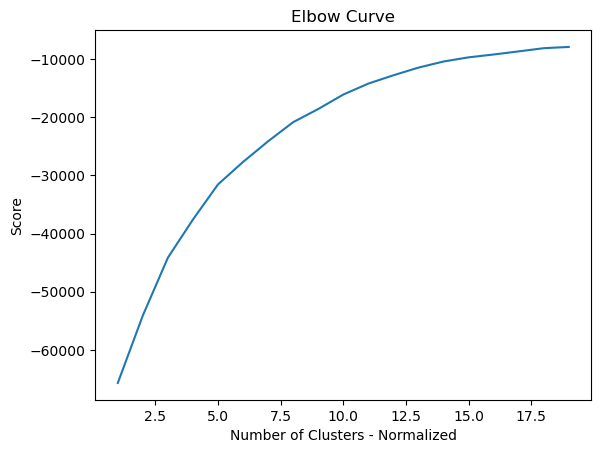

In [28]:
pl.plot(N,score)
pl.xlabel('Number of Clusters - Normalized')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

What does the optimal number of clusters seem to be now? between 5-7


Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [29]:
# Assuming you have determined the optimal number of clusters
n_clusters_optimal = 6 # (replace with your optimal number of clusters)

# Initialize KMeans with the optimal number of clusters
km = KMeans(n_clusters=n_clusters_optimal)

# Fit the model to your data
km.fit(sub_df_encoded)

# Predict the closest cluster each sample in sub_df belongs to
predictions = km.predict(sub_df_encoded)

# Add the cluster predictions to your dataframe
sub_df['Clusters_norm'] = predictions

# Display the dataframe
sub_df


C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,District,Ward,Primary Type,IUCR,Clusters_norm
0,0.041667,0.061224,BATTERY,0.047214,1
1,0.583333,0.571429,CRIMINAL DAMAGE,0.130598,3
2,0.666667,0.775510,WEAPONS VIOLATION,0.011145,4
3,0.416667,0.530612,NARCOTICS,0.208815,0
4,0.416667,0.469388,PROSTITUTION,0.149443,4
...,...,...,...,...,...
62828,0.708333,0.857143,WEAPONS VIOLATION,0.011348,4
62829,0.250000,0.551020,CRIMINAL DAMAGE,0.129585,3
62830,0.291667,0.244898,THEFT,0.083992,2
62831,0.666667,0.693878,MOTOR VEHICLE THEFT,0.089058,4


Here's what the updated clusters look like.

![](cluster_norm.png)


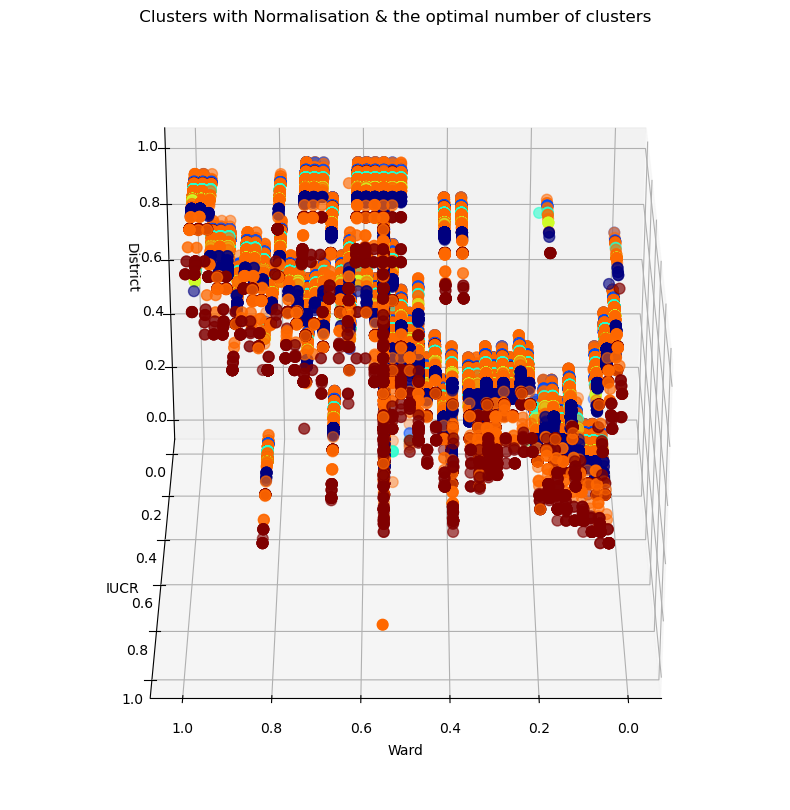

In [30]:

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

pl.title(' Clusters with Normalisation & the optimal number of clusters ')
ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_df["Clusters_norm"], s=60, cmap="jet")
ax.view_init(azim=90)
#print(ax.azim)
plt.show()

Congratulations you've completed this notebook! 
